In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [24]:
house = pd.read_csv("house Final.csv" , sep = "," , encoding = 'utf-8')

In [25]:
house

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3,1
1,1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3,0
2,2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3,1
3,3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3,0
4,4,-122.25,37.85,28.0,1627,280.0,1294.604959,259.0,3.8462,342200,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1,0
20636,20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1,1
20637,20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1,0
20638,20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1,1


In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  int64  
 5   total_bedrooms      20640 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20640 non-null  int64  
 11  gender              20640 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.9 MB


<AxesSubplot:>

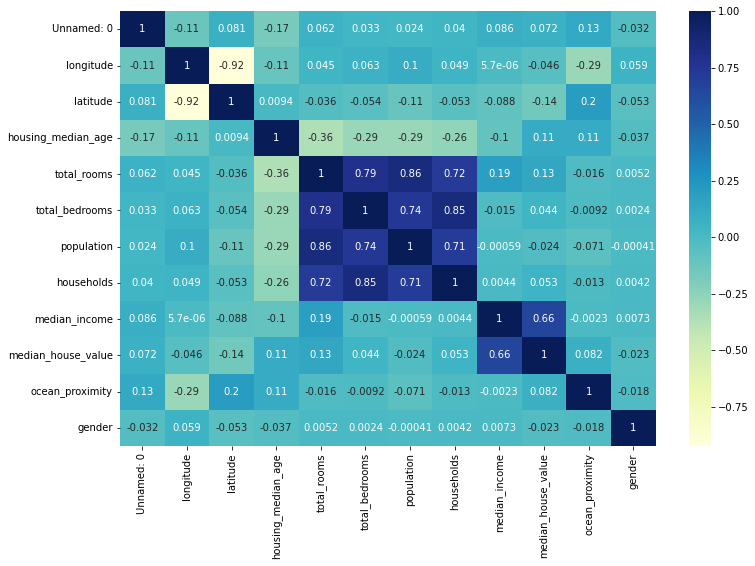

In [27]:
plt.figure(figsize = (12,8))
sns.heatmap(house.corr() , annot = True , cmap = "YlGnBu")

 ## Split Data

In [28]:
house.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [29]:
house = house[['housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'ocean_proximity', "median_house_value"]]

In [30]:
house

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41.0,880,129.0,322.000000,126.0,8.3252,3,452600
1,21.0,7099,1106.0,2401.000000,1138.0,8.3014,3,358500
2,52.0,1467,190.0,496.000000,177.0,7.2574,3,352100
3,52.0,1274,235.0,558.000000,219.0,5.6431,3,341300
4,28.0,1627,280.0,1294.604959,259.0,3.8462,3,342200
...,...,...,...,...,...,...,...,...
20635,25.0,1665,374.0,845.000000,330.0,1.5603,1,78100
20636,18.0,697,150.0,356.000000,114.0,2.5568,1,77100
20637,17.0,2254,485.0,1007.000000,433.0,1.7000,1,92300
20638,18.0,1860,409.0,741.000000,349.0,1.8672,1,84700


In [31]:
x = house.drop(['median_house_value'] , axis = 1).values
y= house['median_house_value' ].values


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [34]:
x_train.shape

(15480, 7)

In [35]:
y_train.shape

(15480,)

## Data Scaling using Robust Scaler 

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [38]:
x_train.shape

(15480, 7)

### Linear Regression 

In [40]:
from sklearn import linear_model

In [41]:
reg = linear_model.LinearRegression()

In [42]:
reg.fit(x_train , y_train)

LinearRegression()

In [43]:
reg.score(x_train , y_train)

0.4871757110136431

In [44]:
reg.score(x_test , y_test)

0.478695758828543

reg.intercept_

In [46]:
reg.coef_

array([ 35355.47015152,   9875.14437607,   8804.761793  , -16708.01842503,
         4506.18106417,  78572.71048006,   3773.62443834])

In [47]:
pd.DataFrame(reg.coef_ , house.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,35355.470152
total_rooms,9875.144376
total_bedrooms,8804.761793
population,-16708.018425
households,4506.181064
median_income,78572.710480
ocean_proximity,3773.624438


In [59]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

In [60]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,47700,92169.129507
1,45800,146482.341299
2,500001,253966.339620
3,218600,275925.783050
4,278000,224076.797417
5,158700,161146.562540
6,198200,267857.378203
7,157500,205105.518247
8,340000,207796.959749
9,446600,420644.048258


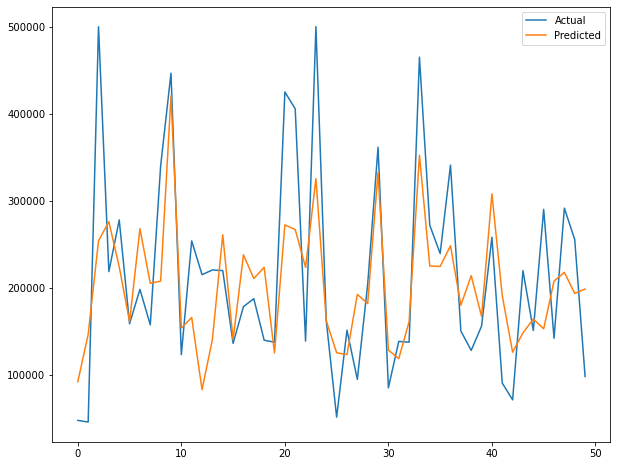

In [62]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

  ## Ridg regression

In [78]:
reg = linear_model.Ridge(  alpha=0.9)

In [79]:
reg.fit(x_train , y_train)


Ridge(alpha=0.9)

In [80]:
reg.fit(x_train , y_train)


Ridge(alpha=0.9)

In [81]:
reg.score(x_train , y_train)


0.4871757080678579

In [82]:
reg.score(x_test , y_test)


0.4786991754190498

In [83]:
pd.DataFrame(reg.coef_ , house.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,35349.265259
total_rooms,9874.350203
total_bedrooms,8803.100570
population,-16705.976959
households,4506.148449
median_income,78567.604661
ocean_proximity,3773.927527


In [84]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,47700,92177.654903
1,45800,146486.399338
2,500001,253959.696674
3,218600,275921.369953
4,278000,224076.168857
5,158700,161154.504342
6,198200,267850.631137
7,157500,205102.807221
8,340000,207803.305654
9,446600,420625.706270


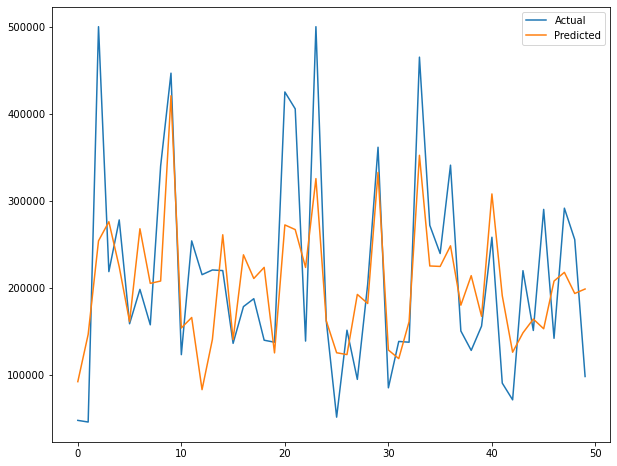

In [85]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

## Lasso Regression

In [87]:
reg = linear_model.Lasso(alpha=0.9)

In [88]:
reg.fit(x_train,y_train)

Lasso(alpha=0.9)

In [89]:
reg.score(x_train , y_train)


0.48717571019756445

In [90]:
reg.score(x_test , y_test)


0.47869639126500607

In [91]:
pd.DataFrame(reg.coef_ , house.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,35352.544756
total_rooms,9871.549601
total_bedrooms,8804.893676
population,-16703.730716
households,4504.554889
median_income,78572.448001
ocean_proximity,3773.521090


In [92]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,47700,92172.668660
1,45800,146481.968606
2,500001,253957.027143
3,218600,275926.274226
4,278000,224074.019794
5,158700,161148.246210
6,198200,267856.885829
7,157500,205106.319292
8,340000,207799.319405
9,446600,420640.228071


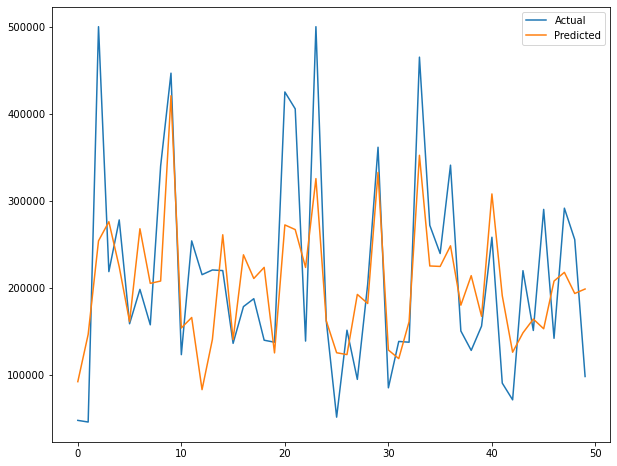

In [93]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

## VIF